In [1]:
import tensorflow as tf

#Load DataSet

In [2]:
mist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mist.load_data()

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#Sacling Data in range of 0 and 1

In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#CNN Architecture and its layers

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Softmax

In [8]:
model=Sequential()

In [9]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize the loss
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2636 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0325 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

In [11]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9780


In [12]:
val_accuracy

0.9779999852180481

In [13]:
val_loss

0.1015588715672493

In [14]:
model.save(r'E:\DataScience\HandwrittenDigitClassification\digit_model.model')

INFO:tensorflow:Assets written to: E:\DataScience\HandwrittenDigitClassification\digit_model.model\assets


In [15]:
new_model=tf.keras.models.load_model(r'E:\DataScience\HandwrittenDigitClassification\digit_model.model')
predictions=new_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
predictions[0]

array([4.48803372e-16, 3.90795339e-12, 1.99162367e-10, 5.58737838e-08,
       1.91288288e-18, 9.09299898e-14, 6.21545580e-20, 1.00000000e+00,
       4.31504231e-14, 1.02467215e-10], dtype=float32)

In [17]:
import numpy as np
np.argmax(predictions[1])

2

#Comparing output Machine Output and actual image Output

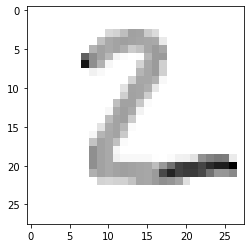

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()